In [1]:
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [2]:
api_key = '583f72921975ede08f1dcbcface9a11e8836ef1a'

In [3]:
symbol = 'AAPL'

In [4]:
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2023, 8, 20)

In [5]:
tiingo_data = pdr.tiingo.TiingoDailyReader(
    symbols=symbol,
    start=start_date,
    end=end_date,
    api_key=api_key
)

In [6]:
df = tiingo_data.read()
df.head()

<ipython-input-6-a7d90d8b948f>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = tiingo_data.read()


close    high     low    open   volume  \
symbol date                                                                 
AAPL   2000-01-03 00:00:00+00:00  111.94  112.50  101.69  104.87  4783900   
       2000-01-04 00:00:00+00:00  102.50  110.62  101.19  108.25  4574800   
       2000-01-05 00:00:00+00:00  104.00  110.56  103.00  103.75  6949300   
       2000-01-06 00:00:00+00:00   95.00  107.00   95.00  106.12  6856900   
       2000-01-07 00:00:00+00:00   99.50  101.00   95.50   96.50  4113700   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
AAPL   2000-01-03 00:00:00+00:00  0.848235  0.852479  0.770565  0.794662   
       2000-01-04 00:00:00+00:00  0.776703  0.838233  0.766776  0.820274   
       2000-01-05 00:00:00+00:00  0.788069  0.837778  0.780492  0.786175   
       2000-01-06 00:00:00+00:00  0.719871  0.810802  0.719871  0.804134   
       2000-01-07 00:00:00+00:00  0.753970  0.765337  0.723660  0.731237   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2000-01-03 00:00:00+00:00  535797335      0.0          1.0  
       2000-01-04 00:00:00+00:00  512378112      0.0          1.0  
       2000-01-05 00:00:00+00:00  778322378      0.0          1.0  
       2000-01-06 00:00:00+00:00  767973567      0.0          1.0  
       2000-01-07 00:00:00+00:00  460734860      0.0          1.0

In [7]:
df.shape

(5945, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5945 entries, ('AAPL', Timestamp('2000-01-03 00:00:00+0000', tz='UTC')) to ('AAPL', Timestamp('2023-08-18 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        5945 non-null   float64
 1   high         5945 non-null   float64
 2   low          5945 non-null   float64
 3   open         5945 non-null   float64
 4   volume       5945 non-null   int64  
 5   adjClose     5945 non-null   float64
 6   adjHigh      5945 non-null   float64
 7   adjLow       5945 non-null   float64
 8   adjOpen      5945 non-null   float64
 9   adjVolume    5945 non-null   int64  
 10  divCash      5945 non-null   float64
 11  splitFactor  5945 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 750.5+ KB


In [9]:
df.isnull().sum()*100/len(df)

close          0.0
high           0.0
low            0.0
open           0.0
volume         0.0
adjClose       0.0
adjHigh        0.0
adjLow         0.0
adjOpen        0.0
adjVolume      0.0
divCash        0.0
splitFactor    0.0
dtype: float64

In [10]:
df1 = df.reset_index()['close']

In [11]:
df1

0       111.94
1       102.50
2       104.00
3        95.00
4        99.50
         ...  
5940    179.46
5941    177.45
5942    176.57
5943    174.00
5944    174.49
Name: close, Length: 5945, dtype: float64

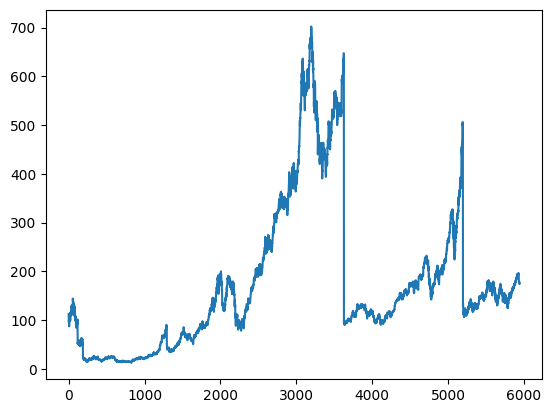

In [12]:
plt.plot(df1)

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.14342942]
 [0.129728  ]
 [0.13190514]
 ...
 [0.23723475]
 [0.2335046 ]
 [0.2342158 ]]


In [15]:
training_size = int(len(df1)*0.75)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(4458, 1487)

In [17]:
train_data

array([[0.14342942],
       [0.129728  ],
       [0.13190514],
       ...,
       [0.21125432],
       [0.2113414 ],
       [0.20748062]])

In [18]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [19]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [20]:
print(X_train.shape),print(y_train.shape)

(4357, 100)
(4357,)


(None, None)

In [21]:
print(X_test.shape), print(y_test.shape)

(1386, 100)
(1386,)


(None, None)

In [22]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [30]:
model=Sequential()
model.add(LSTM(81,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(36,return_sequences=True))
model.add(LSTM(27))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 81)           26892     
                                                                 
 lstm_7 (LSTM)               (None, 100, 36)           16992     
                                                                 
 lstm_8 (LSTM)               (None, 27)                6912      
                                                                 
 dense_2 (Dense)             (None, 1)                 28        
                                                                 
Total params: 50,824
Trainable params: 50,824
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 81)           26892     
                                                                 
 lstm_7 (LSTM)               (None, 100, 36)           16992     
                                                                 
 lstm_8 (LSTM)               (None, 27)                6912      
                                                                 
 dense_2 (Dense)             (None, 1)                 28        
                                                                 
Total params: 50,824
Trainable params: 50,824
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1,callbacks=[early_stopping])

Epoch 1/100
69/69 [==============================] - 10s 37ms/step - loss: 0.0082 - val_loss: 0.0023
Epoch 2/100
69/69 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 3/100
69/69 [==============================] - 1s 15ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 4/100
69/69 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 5/100
69/69 [==============================] - 1s 15ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/100
69/69 [==============================] - 1s 15ms/step - loss: 8.9696e-04 - val_loss: 9.8629e-04
Epoch 7/100
69/69 [==============================] - 1s 15ms/step - loss: 7.8771e-04 - val_loss: 0.0010
Epoch 8/100
69/69 [==============================] - 1s 15ms/step - loss: 7.6222e-04 - val_loss: 7.8979e-04
Epoch 9/100
69/69 [==============================] - 1s 15ms/step - loss: 6.2485e-04 - val_loss: 7.3884e-04
Epoch 10/100
69/69 [==============================] - 1s 17ms/step - lo

In [35]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

44/44 [==============================] - 0s 5ms/step


In [36]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

237.74927890182903

In [38]:
math.sqrt(mean_squared_error(y_test,test_predict))

198.40729940849664

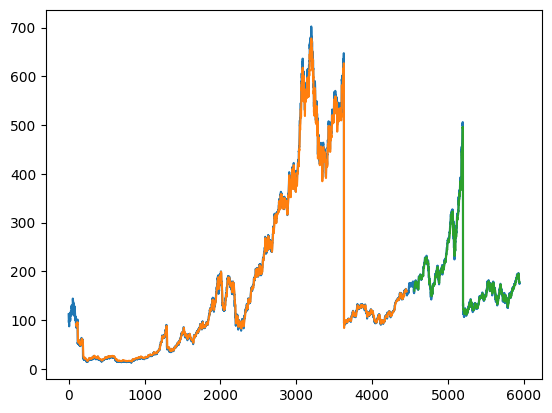

In [39]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan


testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [40]:
len(test_data)

1487

In [41]:
x_input=test_data[1387:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.20977386861737643,
 0.2143023019536126,
 0.21661006124996374,
 0.22029667044036114,
 0.2221399750355598,
 0.22135620772736508,
 0.21864205056750557,
 0.2199483294144968,
 0.21613109233940028,
 0.21434584458184563,
 0.2133298499230747,
 0.221254608261488,
 0.22074661093210254,
 0.22077563935092454,
 0.22257540131789022,
 0.22425904960956777,
 0.22283665708728848,
 0.22047084095329328,
 0.22092078144503471,
 0.2186565647769166,
 0.21864205056750557,
 0.2253911579436268,
 0.2272344625388255,
 0.2271038346541264,
 0.22557984266596998,
 0.22399779384016952,
 0.2215884350779413,
 0.2328804899997097,
 0.23277889053383263,
 0.2302679323057273,
 0.23285871868559319,
 0.23314174576910798,
 0.23142906905860836,
 0.2307033585880577,
 0.2307033585880577,
 0.23160323957154053,
 0.23502859299253973,
 0.23518824929606083,
 0.23379488519260352,
 0.22996313390809603,
 0.2303695317716044,
 0.23203866585387098,
 0.2355801329501582,
 0.2382942901100177,
 0.23822171906296266,
 0.24234375453569043,
 0.243

In [44]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.2357849]
101
1 day input [0.2143023  0.21661006 0.22029667 0.22213998 0.22135621 0.21864205
 0.21994833 0.21613109 0.21434584 0.21332985 0.22125461 0.22074661
 0.22077564 0.2225754  0.22425905 0.22283666 0.22047084 0.22092078
 0.21865656 0.21864205 0.22539116 0.22723446 0.22710383 0.22557984
 0.22399779 0.22158844 0.23288049 0.23277889 0.23026793 0.23285872
 0.23314175 0.23142907 0.23070336 0.23070336 0.23160324 0.23502859
 0.23518825 0.23379489 0.22996313 0.23036953 0.23203867 0.23558013
 0.23829429 0.23822172 0.24234375 0.24359198 0.24160353 0.2410665
 0.23904903 0.24304044 0.24360649 0.24771401 0.24701733 0.24794624
 0.25093617 0.24935412 0.24948475 0.24796075 0.25237307 0.25190862
 0.24986212 0.25391158 0.25563877 0.25613225 0.26248948 0.26029783
 0.25865773 0.25935441 0.2577143  0.25470986 0.25394061 0.25639351
 0.2575111  0.25772882 0.26251851 0.26214114 0.26412958 0.26127028
 0.25954309 0.26071874 0.26198148 0.26325873 0.26140091 0.26518912
 0.266089   0.26486255 0.260472   0

In [45]:
day_new = np.arange(1,100)
day_pred = np.arange(101,131)

In [46]:
len(df1)

5945

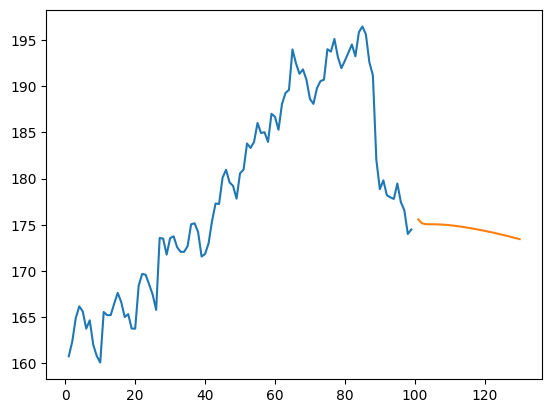

In [47]:
plt.plot(day_new, scaler.inverse_transform(df1[5846:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

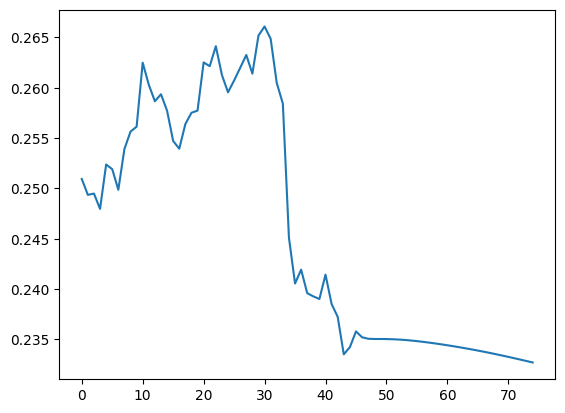

In [48]:
df2 = df1.tolist()
df2.extend(lst_output)
plt.plot(df2[5900:])

In [49]:
df2=scaler.inverse_transform(df2).tolist()

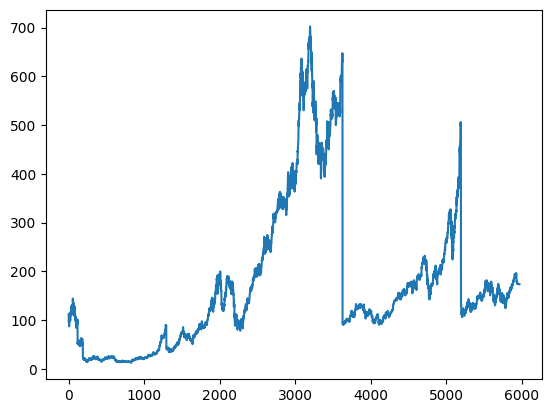

In [50]:
plt.plot(df2)